# Business Understanding
Here are three questions to help us understand more:  
-  Whats the most booked ? 
-  who has the most number of rooms? 
-  Whats the most booked room type? 
-  can you get scammed ?


# Data Understanding
Here we are trying to understand the data size and evalute what we need to answer our questions.

In [99]:
#we import libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 

#Read in the dataset and take a look at the first few rows here:
df = pd.read_csv('listings.csv')
df.head()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


# Data Prepreation 
Here we created new dataframe to have only the coulumns we need and then we cleand that data to have only usefull data.

In [100]:
#we take the columns we need and add it to new dataframe:

new_df = df[['id', 'last_scraped','name','summary','notes','host_id','host_name','host_response_time','host_response_rate','host_acceptance_rate','host_is_superhost','host_identity_verified','host_total_listings_count','property_type','room_type','accommodates','bathrooms','beds','bed_type','amenities','price','security_deposit','guests_included','extra_people','minimum_nights','maximum_nights','availability_365','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_value','review_scores_communication','instant_bookable','cancellation_policy','require_guest_phone_verification','calculated_host_listings_count','reviews_per_month']]

In [101]:
#we check how many columns and rows are there
new_df.shape

(3818, 38)

In [102]:
#we check types
new_df.info();
#we notice we dont need to change (wen can change last_scraped to DATE but we wont need it)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 38 columns):
id                                  3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
notes                               2212 non-null object
host_id                             3818 non-null int64
host_name                           3816 non-null object
host_response_time                  3295 non-null object
host_response_rate                  3295 non-null object
host_acceptance_rate                3045 non-null object
host_is_superhost                   3816 non-null object
host_identity_verified              3816 non-null object
host_total_listings_count           3816 non-null float64
property_type                       3817 non-null object
room_type                           3818 non-null object
accommodates                        381

In [103]:
#How many missing values in the dataset? 
new_df.isna().sum()

id                                     0
last_scraped                           0
name                                   0
summary                              177
notes                               1606
host_id                                0
host_name                              2
host_response_time                   523
host_response_rate                   523
host_acceptance_rate                 773
host_is_superhost                      2
host_identity_verified                 2
host_total_listings_count              2
property_type                          1
room_type                              0
accommodates                           0
bathrooms                             16
beds                                   1
bed_type                               0
amenities                              0
price                                  0
security_deposit                    1952
guests_included                        0
extra_people                           0
minimum_nights  

In [104]:
#drop null values
new_df=new_df.dropna()


In [105]:
#how many diplicated rows?
new_df[['host_id']].duplicated().sum()

#we learned that theres 255 host that own more than one property

255

In [106]:
#After dropping
new_df.shape

(895, 38)

In [107]:
new_df

,id,last_scraped,name,summary,notes,host_id,host_name,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_value,review_scores_communication,instant_bookable,cancellation_policy,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1,953595,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,What's up with the free pillows? Our home was...,5177328,Andrea,within an hour,98%,100%,...,96.0,10.0,10.0,10.0,10.0,f,strict,t,6,1.48
2,3308979,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,Our house is located just 5 short blocks to To...,16708587,Jill,within a few hours,67%,100%,...,97.0,10.0,10.0,10.0,10.0,f,strict,f,2,1.15
6,1909058,2016-01-04,Queen Anne Private Bed and Bath,Enjoy a quiet stay in our comfortable 1915 Cra...,The room now has a mini frig to keep your favo...,2497928,Gary And Beth,within an hour,100%,100%,...,99.0,10.0,10.0,10.0,10.0,f,moderate,f,1,2.46
7,856550,2016-01-04,Tiny Garden cabin on Queen Anne,"Our tiny cabin is private , very quiet and com...",There are three rentals in our back yard . If ...,4016632,Jean-Marc,within an hour,100%,100%,...,97.0,10.0,10.0,10.0,10.0,f,strict,t,5,4.73
9,2493658,2016-01-04,Airy + Bright Queen Anne Apartment,"Beautiful apartment in an extremely safe, quie...",What's up with the free pillows? Our home was...,5177328,Andrea,within an hour,98%,100%,...,97.0,10.0,10.0,9.0,10.0,f,strict,t,6,1.55
12,3883392,2016-01-04,Open Plan 2bdr/1bath in Queen Anne,Spacious apt in popular Seattle neighborhood. ...,"Seattle is a ""green"" town. Composting and re...",19932967,Pat & Roberta,within an hour,100%,100%,...,98.0,10.0,10.0,10.0,10.0,f,moderate,f,1,0.92
14,5680462,2016-01-04,Stunning 6 bd in THE BEST Location!,"Stunning Designsponge featured 6 bed, 3.75 bat...",The house is great for large groups or extende...,22372266,Sarah,within an hour,100%,100%,...,98.0,9.0,10.0,10.0,10.0,t,strict,f,1,2.65
16,3245876,2016-01-04,Park Life in Lower Queen Anne,Master bedroom suite with 1/4 bath & kitchenet...,"I have two cats, Tori Spelling and Denzel. The...",9465817,Libby,within an hour,100%,100%,...,95.0,10.0,9.0,9.0,10.0,f,moderate,f,1,4.55
17,4933447,2016-01-04,"Private Garden Suite, Bay View",Beautiful private entrance garden suite overlo...,Electric hot water kettle provided for hot bev...,25417834,Markus And Melissa,within an hour,100%,100%,...,98.0,10.0,10.0,10.0,10.0,t,moderate,f,1,4.58
25,3544550,2016-01-04,VIEW-Monthly Rental Available,Our home is very light and full of character a...,Our house is located just 5 short blocks to To...,16708587,Jill,within a few hours,67%,100%,...,100.0,10.0,10.0,10.0,10.0,f,strict,f,2,1.30


# Modeling and evaluting 
Now we can start Answering our qustions :

# # Q1: Whats the most booked ?

In [108]:
#we sort by number of reviews which indicates how many times the property got booked and used therefore have reviewe
result1 = new_df[['host_id', 'name','number_of_reviews','require_guest_phone_verification']].sort_values('number_of_reviews', ascending=False).head()
result1

,host_id,name,number_of_reviews,require_guest_phone_verification
1447,1025723,contemporary art loft downtown [7],474,t
1441,1025723,contemporary art loft downtown [17],466,t
2610,934641,1BR Cozy Apartment in Capitol Hill,278,f
2764,934641,Spacious Apartment in Capitol Hill!,255,f
3774,601600,Teeny Tiny Guestyhouse!,210,f


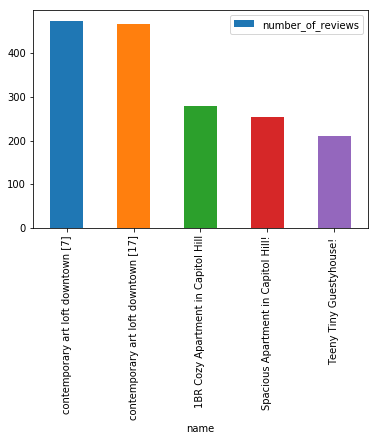

In [109]:
#we Graph it using bar digram:
result1.plot.bar(x='name', y='number_of_reviews'); 

We took number of reviwes on a property to indcate how many times it got booked and therefore we can see in the graph that **contemporary art loft downtown [7]** was the most booked property in seattle that year  


# #Q2: who has the most number of rooms?

In [127]:
#first i sorted the "newDataframe" by listings count.
#then i dropped the unwanted columns and stored the results to "Q2_dropDub"
#finally i dropped the dublicates taking in consideration 
#the host name and host ID to keep hosts that share same names but diffrent ID.
#then we print.

Q2=new_df.sort_values('calculated_host_listings_count',ascending=False)
Q2_dropDup = Q2[['host_id','host_name','calculated_host_listings_count' ,'host_is_superhost','host_identity_verified']]
result2=Q2_dropDup.drop_duplicates(subset=["host_name", "host_id"]).head()
result2




,host_id,host_name,calculated_host_listings_count,host_is_superhost,host_identity_verified
350,1243056,Andrew,37,f,t
729,3074414,Melissa,34,f,t
737,26967583,Dario,21,f,f
2766,42537846,Eric,15,f,t
1253,1623580,Mack & Sophia,12,f,t


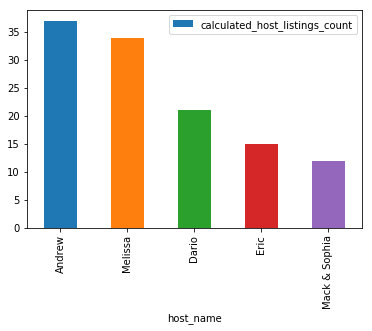

In [111]:
#we graph:
result2.plot.bar(x='host_name', y='calculated_host_listings_count'); 

We found that the host with ID number **1243056** own the most properties by **37 listings** in seattle on airbnb.
and after looking for the ID we found that the ID owner is **Andrew** 

# #Q3: Whats the most booked room type?

In [112]:
#we group by room type to check which has the most reviwes indcating most booking and then we sort:
result3 = new_df.groupby(['room_type'])['number_of_reviews'].sum()
resul3=result3.sort_values(ascending=False)
resul3


room_type
Entire home/apt    19532
Private room        7559
Shared room           95
Name: number_of_reviews, dtype: int64

In [113]:
#here we check if the total above equals the total reviwes in the new dataframe :
new_df['number_of_reviews'].sum()

27186

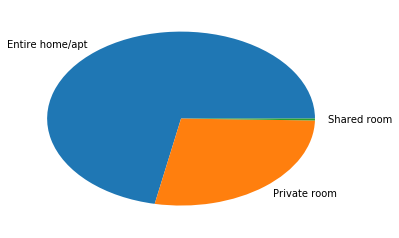

In [114]:
#we graph using Pie chart:
mylabels = ["Entire home/apt", "Private room", "Shared room"]
plt.pie(result3,labels=mylabels)
plt.show() 

The most poublur proprty type is **Entire home** where people pprovied thier entire home for guests

# #Q4:  can you get scammed ?

In [115]:
#here we check how many properties ask for phone verification:
result4 = new_df.groupby(['require_guest_phone_verification'])['name'].count()
result4=result4.sort_values(ascending=False)
result4=result4/895*100
result4

require_guest_phone_verification
f    89.832402
t    10.167598
Name: name, dtype: float64

In [116]:
#here we check how many hosts have thier identity verified:
result4_p2 = new_df.groupby(['host_identity_verified'])['name'].count()
result4_p2=result4_p2.sort_values(ascending=False)
result4_p2=result4_p2/895*100
result4_p2

host_identity_verified
t    87.26257
f    12.73743
Name: name, dtype: float64

In [124]:
#we check the how many hosts are super hosts:
result4_p3 = new_df.groupby(['host_is_superhost'])['name'].count()
result4_p3=result4_p3.sort_values(ascending=False)
result4_p3=result4_p3/895*100
result4_p3

host_is_superhost
f    69.050279
t    30.949721
Name: name, dtype: float64

In [117]:
#we
result1_q4 = new_df[['host_id', 'host_name','number_of_reviews','require_guest_phone_verification','host_is_superhost','host_identity_verified']].sort_values('number_of_reviews', ascending=False).head(10)
result1_q4

,host_id,host_name,number_of_reviews,require_guest_phone_verification,host_is_superhost,host_identity_verified
1447,1025723,Dirk & Jaq,474,t,f,t
1441,1025723,Dirk & Jaq,466,t,f,t
2610,934641,Nick,278,f,f,f
2764,934641,Nick,255,f,f,f
3774,601600,Hal,210,f,t,t
63,4016632,Jean-Marc,191,t,t,t
2616,934641,Nick,189,f,f,f
1094,2070664,Gillian,188,f,t,t
3058,19928221,Debbie,175,f,t,t
2625,2739131,Chad & Ruben,175,t,t,t


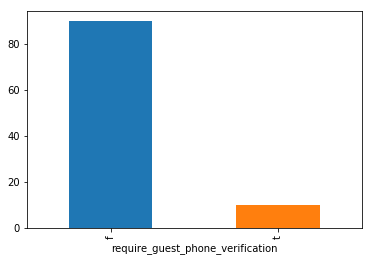

In [118]:
#we graph:
result4.plot.bar(y='number_of_reviews'); 

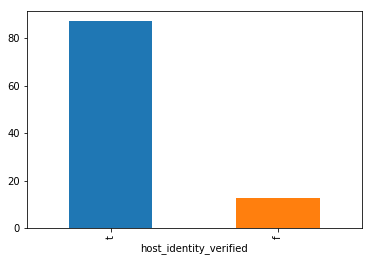

In [119]:
result4_p2.plot.bar(y='host_identity_verified'); 

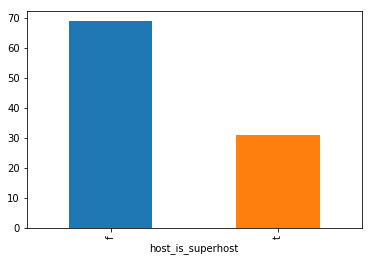

In [125]:
result4_p3.plot.bar(y='host_identity_verified'); 

almost **90%** of hosts in seattle have thier identity verified and 30% of total hosts in seattle are super hosts